## Non-parametric Correlation Analysis
You can use non-parametric correlation analysis to find correlations between categorical, non-linearly related, non-normally distributed variables 

### Spearman's Rank Correlation
Finds the R correlation between variable pairs of ordinal (a numeric variable that is able to be categorised) data type
Variable pairs can then be ranked according to the strength of the correlation between them.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [3]:
rcParams['figure.figsize'] = 14,7
plt.style.use('seaborn-whitegrid')

/var/folders/3q/j84b86hj607f35k14mxzywn00000gn/T/ipykernel_63533/1781219475.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
cars = pd.read_csv("../Data/mtcars.csv")
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


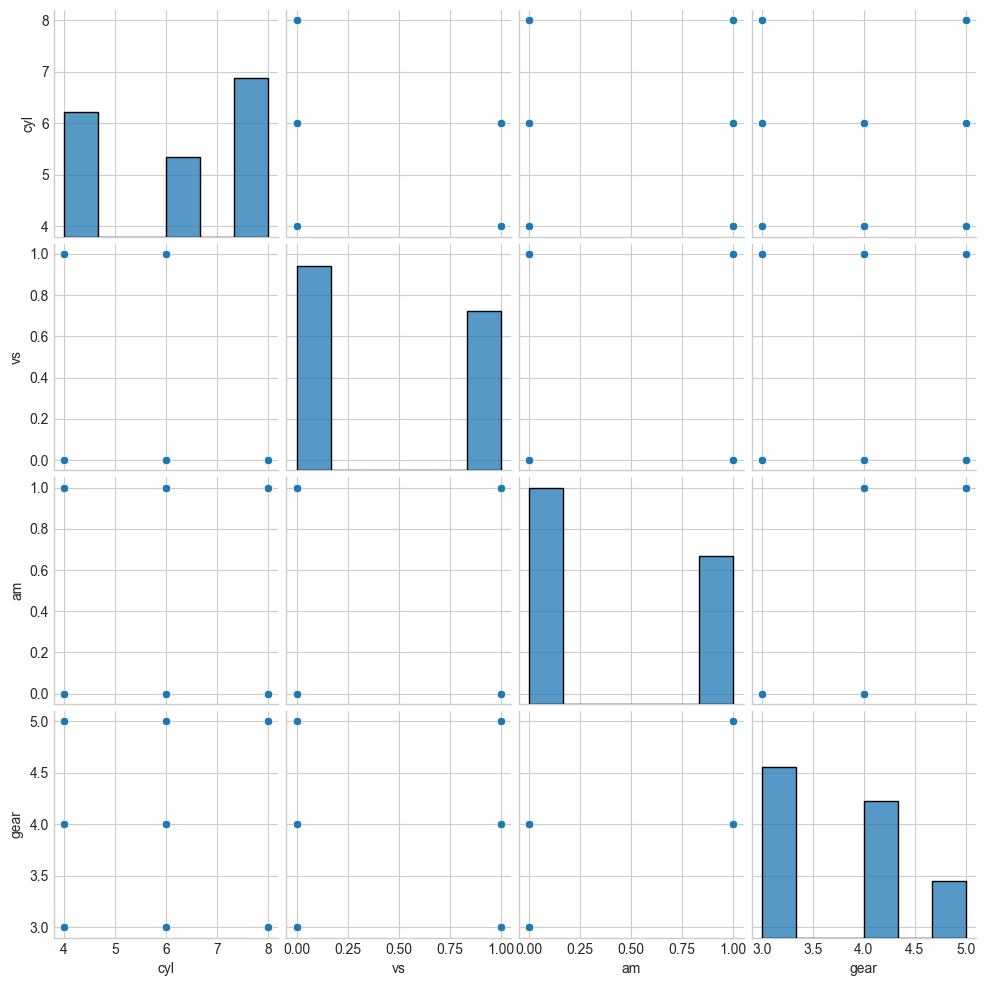

In [5]:
sub_df = cars[['cyl','vs','am','gear']]
sb.pairplot(sub_df)

In [7]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print(f"The Spearman Rank Correlation Coefficient : {spearmanr_coefficient:.3f}")

The Spearman Rank Correlation Coefficient : -0.814


In [8]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print(f"The Spearman Rank Correlation Coefficient : {spearmanr_coefficient:.3f}")

The Spearman Rank Correlation Coefficient : -0.522


In [9]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print(f"The Spearman Rank Correlation Coefficient : {spearmanr_coefficient:.3f}")

The Spearman Rank Correlation Coefficient : -0.564


### Chi-squared test for independence
Note that in order to state that varaibles are independent of each other we need a `p_value` that is greater then `0.05`. In the examples below we would conclude that the variable are correlated.

In [10]:
from scipy.stats import chi2_contingency

xtab = pd.crosstab(cyl, am)
chi2, p, dof, expected  = chi2_contingency(xtab)
print(f"Chi-squared : {chi2:.3f} / p_value : {p:.3f}")

Chi-squared : 8.741 / p_value : 0.013


In [11]:
xtab = pd.crosstab(cyl, vs)
chi2, p, dof, expected  = chi2_contingency(xtab)
print(f"Chi-squared : {chi2:.3f} / p_value : {p:.3f}")

Chi-squared : 21.340 / p_value : 0.000


In [12]:
xtab = pd.crosstab(cyl, gear)
chi2, p, dof, expected  = chi2_contingency(xtab)
print(f"Chi-squared : {chi2:.3f} / p_value : {p:.3f}")

Chi-squared : 18.036 / p_value : 0.001
